# Temporal Trajectories of Microbiome Development

In this notebook we will investigate changes in microbiome composition over the the course of 6 months.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from qiime2 import Artifact

plt.style.use("../presentation_style")

%matplotlib inline

In [2]:
data_dir = "../data"
scripts_dir = "./src"

This script performs differential abundance analysis with ANCOM-BC2 with abundance data collapsed to genus level. Even though we have species level information, genus level is more approriate. The database that the classifier is used on does not curate species information as nicely as higher order information, which leads to misannotations. 

With ANCOM-BC2 we can add a random intercept to the model to control for intra-infant variability. This is done by specifying `--p-random-effects-formula "(1| infant_id)"`, analogous to R formulae.

In [3]:
! bash $scripts_dir/differential_abundance.sh

[2025-12-07 16:36:02] Starting Differential Abundance script
[2025-12-07 16:36:02] Filter feature table for minimal frequency and abundance in samples
/Users/flurinschindele/miniconda3/envs/microbEvolve/lib/python3.10/site-packages/emperor/__init__.py:9: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Saved FeatureTable[Frequency] to: ../data/raw/table_collapsed_abund.qza
[2025-12-07 16:36:25] Feature table filtered successfully
[2025-12-07 16:36:25] Collapse taxa to genus level and merge with feature table
/Users/flurinschindele/miniconda3/envs/microbEvolve/lib/python3.10/site-packages/emperor/__init__.py:9: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as ea

When looking at the created visualization, there is not one genus differentially abundant (q-value < 0.05) between the timepoints. This is quite surprising to us and warrants further investigation.

## Exploration of phylum level

We can take a look at raw changes of phyla abundance over time to get a feel for the data. 

In [4]:
table_collapsed_abund_l6 = Artifact.load(f"{data_dir}/raw/table_collapsed_abund_l6.qza")
df_table_collapsed_abund_l6 = table_collapsed_abund_l6.view(pd.DataFrame)
metadata_collapsed = pd.read_csv(f"{data_dir}/raw/metadata_collapsed.tsv", sep="\t", index_col=0)

/Users/flurinschindele/miniconda3/envs/microbEvolve/lib/python3.10/site-packages/emperor/__init__.py:9: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [5]:
def get_phylum(col_name):
    # Split the taxonomy string by semicolon
    parts = col_name.split(';')
    # Find the part that starts with 'p__'
    for part in parts:
        if part.strip().startswith('p__'):
            return part.strip()
    return "Unassigned"

In [6]:
df_phylum = df_table_collapsed_abund_l6.groupby(get_phylum, axis=1).sum()

df_phylum.head()

/var/folders/t2/68ltn7ds36523gbx2tkkj4zh0000gn/T/ipykernel_52702/1275988446.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_phylum = df_table_collapsed_abund_l6.groupby(get_phylum, axis=1).sum()


,Unassigned,p__Actinomycetota,p__Bacillota,p__Bacteroidota,p__Campylobacterota,p__Cyanobacteriota,p__Fusobacteriota,p__Methanobacteriota,p__Patescibacteria,p__Planctomycetota,p__Pseudomonadota,p__Synergistota,p__Thermodesulfobacteriota,p__Verrucomicrobiota
infant_1_2,0.0,873.0,21443.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,23739.0,0.0,0.0,1.0
infant_2_2,0.0,13021.0,5950.0,781.0,0.0,0.0,0.0,0.0,0.0,0.0,11757.0,0.0,0.0,0.0
infant_3_2,0.0,3870.0,198.0,10843.0,0.0,0.0,0.0,0.0,0.0,0.0,2678.0,0.0,0.0,2.0
infant_4_2,0.0,2186.0,24118.0,2694.0,0.0,1.0,4.0,2.0,0.0,1.0,3428.0,0.0,0.0,0.0
infant_5_2,0.0,35.0,16529.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,21118.0,0.0,0.0,4.0


In [7]:
df_phylum_with_metadata = df_phylum.merge(metadata_collapsed["timepoint"], left_index=True, right_index=True)
df_phylum_with_metadata_timepoint = df_phylum_with_metadata.groupby("timepoint").sum()
df_phylum_with_metadata_timepoint.head()

,Unassigned,p__Actinomycetota,p__Bacillota,p__Bacteroidota,p__Campylobacterota,p__Cyanobacteriota,p__Fusobacteriota,p__Methanobacteriota,p__Patescibacteria,p__Planctomycetota,p__Pseudomonadota,p__Synergistota,p__Thermodesulfobacteriota,p__Verrucomicrobiota
timepoint,,,,,,,,,,,,,,
2 months,0.0,84123.0,89435.0,65442.0,6.0,14.0,7.0,5.0,0.0,1.0,147009.0,0.0,0.0,20.0
4 months,2.0,84750.0,187098.0,118836.0,26.0,26.0,104.0,14.0,12.0,1.0,134813.0,0.0,285.0,10440.0
6 months,0.0,49116.0,239798.0,70836.0,7.0,45.0,211.0,6.0,0.0,1.0,48819.0,1.0,290.0,14932.0


In [8]:
# Convert the count data to percentages based on timepoint
df_phylum_with_metadata_timepoint = df_phylum_with_metadata_timepoint.div(df_phylum_with_metadata_timepoint.sum(axis=1), axis=0)
df_phylum_with_metadata_timepoint.head()

,Unassigned,p__Actinomycetota,p__Bacillota,p__Bacteroidota,p__Campylobacterota,p__Cyanobacteriota,p__Fusobacteriota,p__Methanobacteriota,p__Patescibacteria,p__Planctomycetota,p__Pseudomonadota,p__Synergistota,p__Thermodesulfobacteriota,p__Verrucomicrobiota
timepoint,,,,,,,,,,,,,,
2 months,0.000000,0.217900,0.231660,0.169512,0.000016,0.000036,0.000018,0.000013,0.000000,0.000003,0.380791,0.000000,0.000000,0.000052
4 months,0.000004,0.157996,0.348799,0.221541,0.000048,0.000048,0.000194,0.000026,0.000022,0.000002,0.251326,0.000000,0.000531,0.019463
6 months,0.000000,0.115823,0.565479,0.167042,0.000017,0.000106,0.000498,0.000014,0.000000,0.000002,0.115122,0.000002,0.000684,0.035212


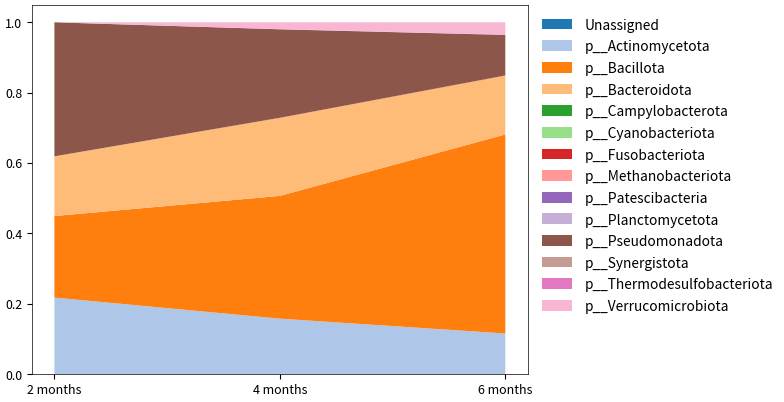

In [9]:
fig, ax = plt.subplots(1, 1)
ax.stackplot(
    df_phylum_with_metadata_timepoint.index,
    df_phylum_with_metadata_timepoint.T,
    labels=df_phylum_with_metadata_timepoint.columns,
    colors=plt.cm.tab20.colors)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

The plot shows clear changes between timepoints. I will look into the family level as well to see if there are similar trends. 

## Exploration of Family level

In [10]:
def get_familiy(col_name):
    # Split the taxonomy string by semicolon
    parts = col_name.split(';')
    # Find the part that starts with 'f__'
    for part in parts:
        if part.strip().startswith('f__'):
            return part.strip()
    return "Unassigned"

In [11]:
df_family = df_table_collapsed_abund_l6.groupby(get_familiy, axis=1).sum()
df_family_with_metadata = df_family.merge(metadata_collapsed["timepoint"], left_index=True, right_index=True)
df_family_with_metadata_timepoint = df_family_with_metadata.groupby("timepoint").sum()
df_family_with_metadata_timepoint.head()

df_family_with_metadata_timepoint = df_family_with_metadata_timepoint.div(df_family_with_metadata_timepoint.sum(axis=1), axis=0)
df_family_with_metadata_timepoint.head()

/var/folders/t2/68ltn7ds36523gbx2tkkj4zh0000gn/T/ipykernel_52702/3876221860.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_family = df_table_collapsed_abund_l6.groupby(get_familiy, axis=1).sum()


,Unassigned,f__Acetobacteraceae,f__Acidaminococcaceae,f__Actinomycetaceae,f__Aeromonadaceae,f__Akkermansiaceae,f__Alcaligenaceae,f__Anaerovoracaceae,f__Atopobiaceae,f__Bacillaceae,...,f__Streptococcaceae,f__Sutterellaceae,f__Synergistaceae,f__Tannerellaceae,f__Tsukamurellaceae,f__Vagococcaceae,f__Veillonellaceae,f__Weeksellaceae,f__Yersiniaceae,f__[Eubacterium]_coprostanoligenes_group
timepoint,,,,,,,,,,,,,,,,,,,,,
2 months,0.000003,0.000005,0.000269,0.001285,0.000000,0.000052,0.000000,0.000000,0.000127,0.000013,...,0.016725,0.003145,0.000000,0.063433,0.000000,0.000005,0.119144,0.000013,0.000008,0.000000
4 months,0.000006,0.000009,0.000007,0.003132,0.000002,0.019463,0.000054,0.000002,0.000069,0.000173,...,0.010073,0.005673,0.000000,0.037376,0.000000,0.000000,0.226429,0.000002,0.000103,0.000000
6 months,0.000005,0.000021,0.020587,0.000934,0.000000,0.035212,0.000000,0.000002,0.000085,0.000033,...,0.009727,0.001118,0.000002,0.005980,0.000002,0.000000,0.467835,0.000002,0.000000,0.000019


In [12]:
import plotly.express as px

plotly_family_df = df_family_with_metadata_timepoint.reset_index().melt(id_vars="timepoint", var_name="Family", value_name="Abundance")
plotly_family_df.head()

,timepoint,Family,Abundance
0,2 months,Unassigned,0.000003
1,4 months,Unassigned,0.000006
2,6 months,Unassigned,0.000005
3,2 months,f__Acetobacteraceae,0.000005
4,4 months,f__Acetobacteraceae,0.000009


In [13]:
fig = px.area(
    plotly_family_df[plotly_family_df["Abundance"] > 0.01].sort_values(by="timepoint"),
    x="timepoint",
    y="Abundance",
    color="Family",
    title="Relative Abundance of Bacterial Families Over Time",
    labels={"timepoint": "Timepoint", "Abundance": "Relative Abundance"}
)
fig.show()

In [14]:
fig = px.bar(
    plotly_family_df[plotly_family_df["Abundance"] > 0.01].sort_values(by="timepoint"),
    x="timepoint",
    y="Abundance",
    color="Family",
    title="Relative Abundance of Bacterial Families Over Time",
    labels={"timepoint": "Timepoint", "Abundance": "Relative Abundance"}
)
fig.show()

These interactivate plotly charts also show that there are clear changes between timepoints. This makes the results from ANCOM-BC2 even more surprising. We will run ANCOM-BC2 again but with different taxonomic levels to collapse the feature tables. If we do not find any differences in these conditions as well, it may just be that controlling for the infant is so crucial. It could simply be, that there are no clear trends over the timepoints that are not explained by the intra-infant variability. 

/var/folders/t2/68ltn7ds36523gbx2tkkj4zh0000gn/T/ipykernel_52702/3643524383.py:20: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



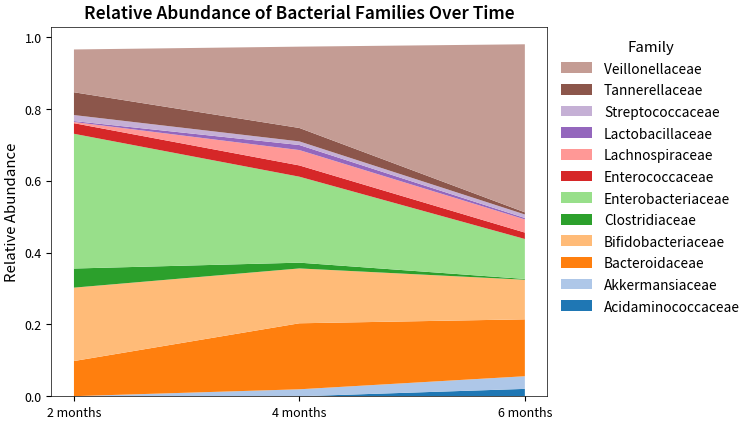

In [15]:
fig, ax = plt.subplots(1, 1)

plot_df = df_family_with_metadata_timepoint[df_family_with_metadata_timepoint.columns[df_family_with_metadata_timepoint.max() > 0.01]].sort_index(axis=1)

ax.stackplot(
    plot_df.index,
    plot_df.T,
    labels=plot_df.columns,
    colors=plt.cm.tab20.colors)

handles, labels = ax.get_legend_handles_labels()
# Remove f__ prefix for better readability
labels = [label[3:] if label.startswith("f__") else label for label in labels]
ax.legend(handles[::-1], labels[::-1], title="Family", loc='upper left', bbox_to_anchor=(1, 1))

ax.set_ylabel("Relative Abundance")
ax.set_title("Relative Abundance of Bacterial Families Over Time")


fig.show()

In [16]:
! qiime taxa collapse \
    --i-table $data_dir/raw/table_collapsed.qza \
    --i-taxonomy $data_dir/raw/taxonomy_weighted_stool.qza \
    --p-level 5 \
    --o-collapsed-table $data_dir/raw/table_collapsed_l5.qza

! qiime composition ancombc2 \
    --i-table $data_dir/raw/table_collapsed_l5.qza \
    --m-metadata-file $data_dir/raw/metadata_collapsed.tsv \
    --p-fixed-effects-formula "timepoint" \
    --p-random-effects-formula "(1 | infant_id)"\
    --p-reference-levels "timepoint::2 months" \
    --p-p-adjust-method "BH" \
    --o-ancombc2-output $data_dir/raw/ancombc_timepoint_differentials_l5.qza

! qiime tools export \
    --input-path $data_dir/raw/ancombc_timepoint_differentials_l5.qza \
    --output-path $data_dir/raw/ancombc_timepoint_differentials_l5

! qiime composition ancombc2-visualizer \
    --i-data $data_dir/raw/ancombc_timepoint_differentials_l5.qza \
    --o-visualization $data_dir/processed/ancombc_timepoints_da_barplot_l5.qzv

/Users/flurinschindele/miniconda3/envs/microbEvolve/lib/python3.10/site-packages/emperor/__init__.py:9: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Saved FeatureTable[Frequency] to: ../data/raw/table_collapsed_l5.qza
/Users/flurinschindele/miniconda3/envs/microbEvolve/lib/python3.10/site-packages/emperor/__init__.py:9: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Saved FeatureData[ANCOMBC2Output] to: ../data/raw/ancombc_timepoint_differentials_l5.qza
/Users/flurinschindele/miniconda3/envs/microbEvolve/lib/python3.10/site-packages/emperor/__init__.py:9: 

In [17]:
! qiime composition ancombc2 \
    --i-table $data_dir/raw/table_collapsed_l5.qza \
    --m-metadata-file $data_dir/raw/metadata_collapsed.tsv \
    --p-fixed-effects-formula "timepoint" \
    --p-p-adjust-method "BH" \
    --o-ancombc2-output $data_dir/raw/ancombc_timepoint_differentials_l5_noinfant.qza

! qiime composition ancombc2-visualizer \
    --i-data $data_dir/raw/ancombc_timepoint_differentials_l5_noinfant.qza \
    --o-visualization $data_dir/processed/ancombc_timepoints_da_barplot_l5_noinfant.qzv

/Users/flurinschindele/miniconda3/envs/microbEvolve/lib/python3.10/site-packages/emperor/__init__.py:9: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Saved FeatureData[ANCOMBC2Output] to: ../data/raw/ancombc_timepoint_differentials_l5_noinfant.qza
/Users/flurinschindele/miniconda3/envs/microbEvolve/lib/python3.10/site-packages/emperor/__init__.py:9: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Saved Visualization to: ../data/processed/ancombc_timepoints_da_barplot_l5_noinfant.qzv


In [18]:
! qiime longitudinal feature-volatility \
        --i-table $data_dir/raw/table_collapsed_l5.qza \
        --m-metadata-file $data_dir/raw/metadata_collapsed.tsv \
        --p-state-column "timepoint" \
        --p-individual-id-column "infant_id" \
        --p-random-state 2025 \
        --p-n-jobs 8 \
        --p-n-estimators 100 \
        --p-parameter-tuning \
        --p-missing-samples "ignore" \
        --output-dir $data_dir/processed/feature_volatility_l5

/Users/flurinschindele/miniconda3/envs/microbEvolve/lib/python3.10/site-packages/emperor/__init__.py:9: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Plugin error from longitudinal:

  state_column must be numeric.

Debug info has been saved to /var/folders/t2/68ltn7ds36523gbx2tkkj4zh0000gn/T/qiime2-q2cli-err-iyx3hy0k.log
